In [4]:
from megane.predictor import Predictor
from PIL import Image
import torch
from torchvision.transforms import functional as TF
from megane import visualize
from megane import configs

In [8]:
cfg = configs.read_config("./configs/db_mobilenet_v3_large.yml")
cfg['weights'] = 'storage/weights/db_mobilenet_v3_large.pt'
cfg['min_threshold'] = .5
cfg['min_box_size'] = 10
print(cfg)
# cfg['weights'] = 'https://github.com/ndgnuh/megane/releases/download/weights-v2/db_mobilenet_v3_large_big.pt'

{'backbone': 'mobilenet_v3_large', 'head': 'dbnet', 'hidden_size': 96, 'num_classes': 1, 'weights': 'storage/weights/db_mobilenet_v3_large.pt', 'image_width': 768, 'image_height': 768, 'shrink_ratio': 0.4, 'expand_ratio': 1.5, 'min_box_size': 10, 'min_score': 0.6, 'min_threshold': 0.5, 'name': 'db_mobilenet_v3_large'}


In [9]:
predictor = Predictor(cfg)

In [10]:
# image = Image.open("/tmp/test.png").convert("RGB")
image = Image.open("toybox/funsd-format.png").convert("RGB")
# image = Image.open("arxiv/train/710de56a-c67c-5eb-000000001.jpg").convert("RGB")
# image = Image.open("data/business_card/images/IMG_20220117_142150.jpg").convert("RGB")
# image = Image.open("data/business_card/images/IMG_20220117_143322.jpg").convert("RGB")
# image.thumbnail((2048, 2048))
# image = image.rotate(5)
# image = Image.open("/tmp/test.png").convert("RGB")

In [11]:
with torch.no_grad():
    polygons, angles, labels, scores, proba_maps = predictor.predict(image)

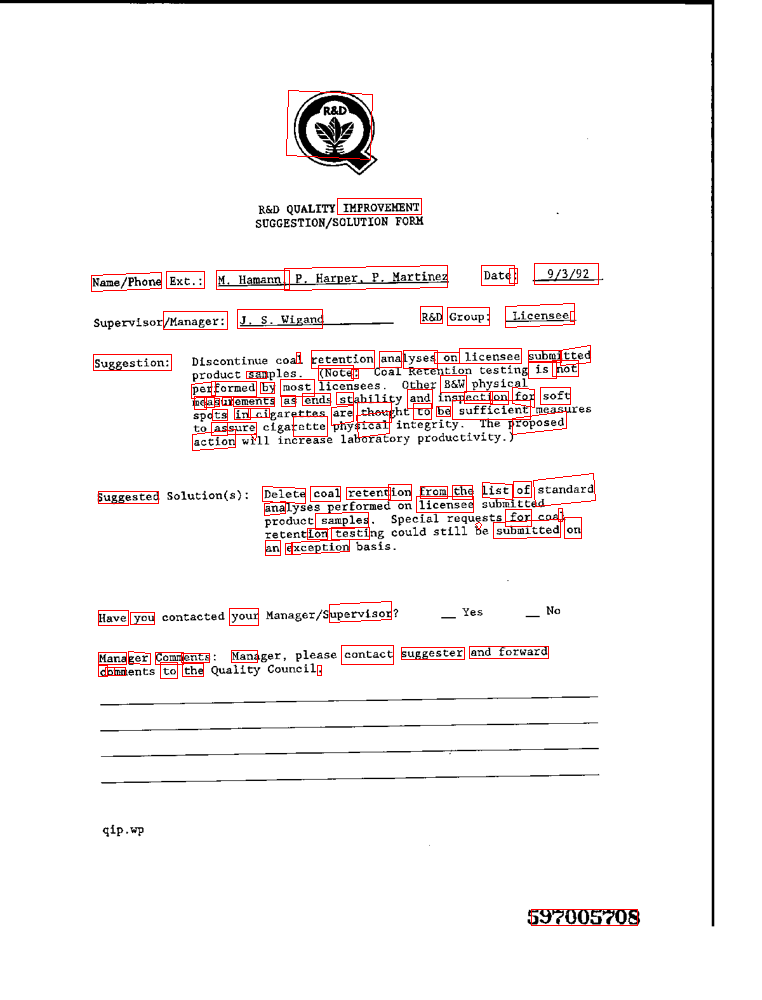

In [12]:
visualize.draw_polygons(image, polygons, outline=(255, 0, 0))

In [13]:
import numpy as np

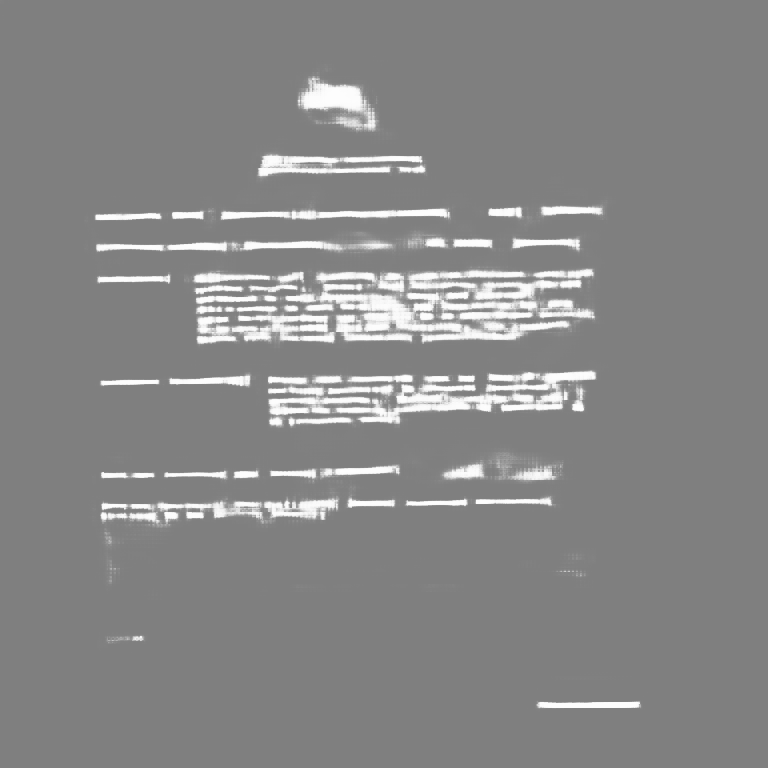

In [14]:
proba_map = TF.to_pil_image(torch.sigmoid(torch.tensor(5 * proba_maps)))
proba_map = np.array(proba_map)
Image.fromarray(proba_map)